<a href="https://colab.research.google.com/github/zyythn/mini-project-ic/blob/main/Latest_ANN%26GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [10/200], Loss: 0.6543, Train Acc: 0.6412, Val Loss: 0.6561, Val Acc: 0.6432
Epoch [20/200], Loss: 0.6509, Train Acc: 0.6412, Val Loss: 0.6538, Val Acc: 0.6432
Validation accuracy did not improve for 20 epochs. Early stopping...


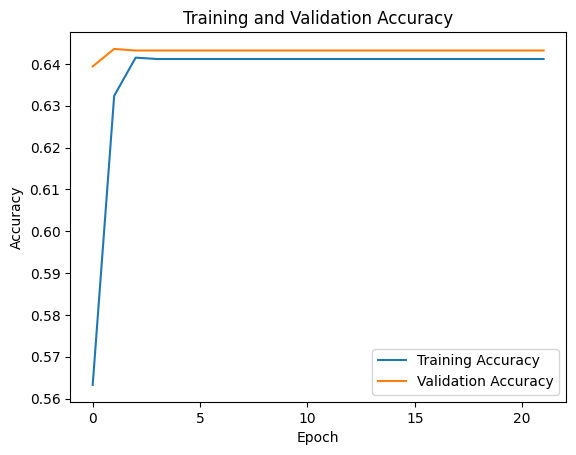

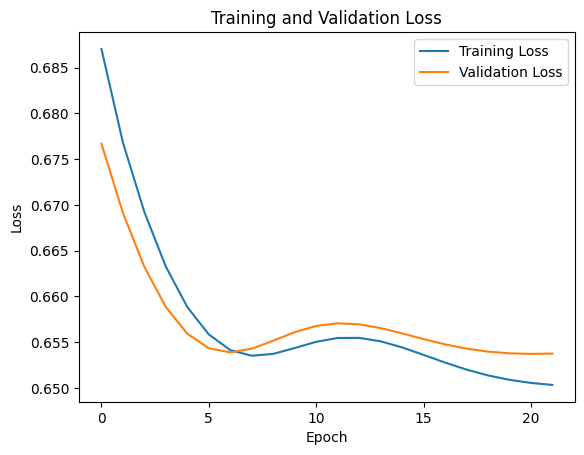

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the ANN model with increased complexity
class ANN(nn.Module):
    def __init__(self, input_size):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(input_size, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 1)
        self.dropout = nn.Dropout(0.2)  # Add dropout layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# Load data from CSV file
data = pd.read_csv('/content/drive/MyDrive/heart_attack_data.csv')  # the path to CSV file
X = data.drop(["Output"], axis = 1)
y = data['Output']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Initialize the model
input_size = X_train.shape[1]
model = ANN(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adjust learning rate

# Lists to store training and validation metrics
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Train the model
max_epochs = 200
best_val_accuracy = 0.0
patience = 20  # Early stopping patience
count = 0  # Counter for patience

for epoch in range(max_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Calculate training accuracy
    predicted = (outputs > 0.5).float()
    train_accuracy = accuracy_score(y_train_tensor, predicted)

    # Calculate validation loss and accuracy
    with torch.no_grad():
        model.eval()
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
        predicted_val = (val_outputs > 0.5).float()
        val_accuracy = accuracy_score(y_test_tensor, predicted_val)

    # Append metrics to lists
    train_losses.append(loss.item())
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss.item())
    val_accuracies.append(val_accuracy)

    # Early stopping based on validation accuracy
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        count = 0
    else:
        count += 1

    if count >= patience:
        print(f'Validation accuracy did not improve for {patience} epochs. Early stopping...')
        break

    # Print training loss and accuracy every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{max_epochs}], Loss: {loss.item():.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss.item():.4f}, Val Acc: {val_accuracy:.4f}')

# Plot training and validation accuracy
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Print the final train and validation accuracy percentages after training:
print(f"Final Train Accuracy: {train_accuracies[-1]*100:.2f}%")
print(f"Final Validation Accuracy: {val_accuracies[-1]*100:.2f}%")

Final Train Accuracy: 64.12%
Final Validation Accuracy: 64.32%


In [ ]:
import pickle

best_val_accuracy = 0.0
best_epoch = 0

# ... (inside your training loop)

if val_accuracy > best_val_accuracy:
    best_val_accuracy = val_accuracy
    best_epoch = epoch

# ... (after training loop)

# Now you can save the best model
with open(f'best_{best_epoch}.pkl', 'wb') as f:
    pickle.dump(model.state_dict(), f)

In [ ]:
torch.save(model.state_dict(), f'best_{best_epoch}.pt')

Best parameters: {'hidden_layer_size': 32, 'activation_function': 'relu', 'optimizer': 'rmsprop', 'accuracy': 0.6371933817863464}
Epoch 1/10
220/220 [==============================] - 1s 3ms/step - loss: 0.6609 - accuracy: 0.6300 - val_loss: 0.6569 - val_accuracy: 0.6372
Epoch 2/10
220/220 [==============================] - 1s 2ms/step - loss: 0.6527 - accuracy: 0.6424 - val_loss: 0.6561 - val_accuracy: 0.6372
Epoch 3/10
220/220 [==============================] - 1s 2ms/step - loss: 0.6520 - accuracy: 0.6421 - val_loss: 0.6555 - val_accuracy: 0.6389
Epoch 4/10
220/220 [==============================] - 0s 2ms/step - loss: 0.6517 - accuracy: 0.6419 - val_loss: 0.6554 - val_accuracy: 0.6395
Epoch 5/10
220/220 [==============================] - 0s 2ms/step - loss: 0.6517 - accuracy: 0.6425 - val_loss: 0.6567 - val_accuracy: 0.6383
Epoch 6/10
220/220 [==============================] - 0s 2ms/step - loss: 0.6507 - accuracy: 0.6432 - val_loss: 0.6560 - val_accuracy: 0.6383
Epoch 7/10
220/220

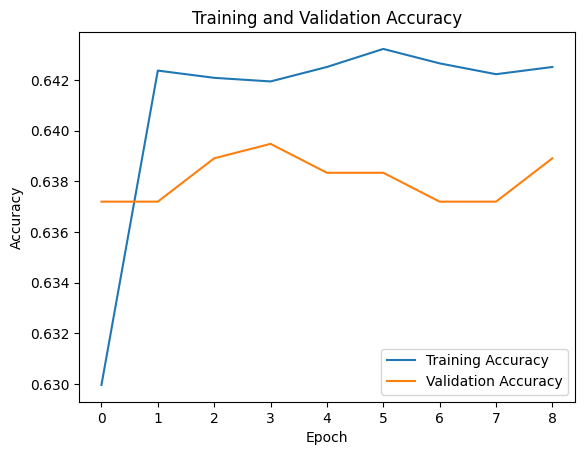

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load data from CSV file
data = pd.read_csv('/content/drive/MyDrive/heart_sort.csv') # the path to CSV file
X = data.drop(["Output"], axis = 1)
y = data['Output']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Define the base model for optimization
def create_model(hidden_layer_size, activation_function, optimizer):
    model = Sequential([
        Dense(hidden_layer_size, activation=activation_function, input_shape=(X_train.shape[1],)),
        Dense(hidden_layer_size, activation=activation_function),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Genetic Algorithm for hyperparameter optimization
def genetic_algorithm(X_train, y_train, param_ranges, population_size, generations):
    best_params = None
    best_accuracy = 0.0

    for _ in range(generations):
        # Generate random population
        population = []
        for _ in range(population_size):
            params = {key: np.random.choice(value) for key, value in param_ranges.items()}
            population.append(params)

        # Evaluate population
        for params in population:
            model = create_model(params['hidden_layer_size'],
                                 params['activation_function'],
                                 params['optimizer'])
            model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
            _, accuracy = model.evaluate(X_val, y_val, verbose=0)
            params['accuracy'] = accuracy

        # Select top performers
        population.sort(key=lambda x: x['accuracy'], reverse=True)
        top_population = population[:int(population_size/2)]

        # Update best parameters if needed
        if top_population[0]['accuracy'] > best_accuracy:
            best_params = top_population[0]
            best_accuracy = top_population[0]['accuracy']

        # Crossover and mutation
        new_population = []
        for _ in range(population_size):
            parent1, parent2 = np.random.choice(top_population, size=2, replace=False)
            child = {}
            for key in param_ranges.keys():
                if np.random.rand() < 0.5:
                    child[key] = parent1[key]
                else:
                    child[key] = parent2[key]
                if np.random.rand() < 0.1:
                    child[key] = np.random.choice(param_ranges[key])
            new_population.append(child)

        population = new_population

    return best_params

# Set hyperparameter ranges for optimization
param_ranges = {
    'hidden_layer_size': [32, 64, 128],
    'activation_function': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop']
}

# Hyperparameters for genetic algorithm
population_size = 10
generations = 5

# Perform hyperparameter optimization using genetic algorithm
best_params = genetic_algorithm(X_train_scaled, y_train, param_ranges, population_size, generations)
print("Best parameters:", best_params)

# Train the best model
best_model = create_model(best_params['hidden_layer_size'],
                          best_params['activation_function'],
                          best_params['optimizer'])
history = best_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_val_scaled, y_val),
                         callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Access the final validation accuracy from history
final_val_accuracy = history.history['val_accuracy'][-1]
final_train_accuracy = history.history['accuracy'][-1]

# Print the final validation accuracy percentage
final_val_accuracy_percent = final_val_accuracy * 100
final_accuracy_percent = final_train_accuracy * 100
# Print with "%" symbol
print(f"Final Trained Accuracy: {final_accuracy_percent:.2f}%")
print(f"Final Validation Accuracy: {final_val_accuracy_percent:.2f}%")

Final Trained Accuracy: 64.25%
Final Validation Accuracy: 63.89%
